### MNIST Hand-written Digit Recognizer

In [1]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
#import the mnist dataset

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Explore The Data

In [ ]:
print("Training data: {}, {}".format(train_images.shape, train_labels.shape))

print("Test data: {}, {}".format(test_images.shape, test_labels.shape))

class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))



Training data: (60000, 28, 28), (60000,)
Test data: (10000, 28, 28), (10000,)
There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


### Preprocess the Data

The data must be preprocessed before training the network. Inspecting some of the images in the data set, we see that the pixel values fall in the range of 0 to 255

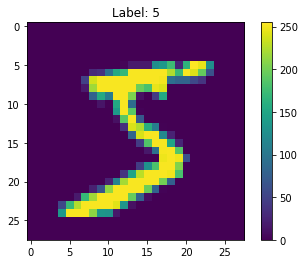

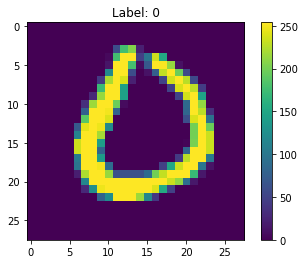

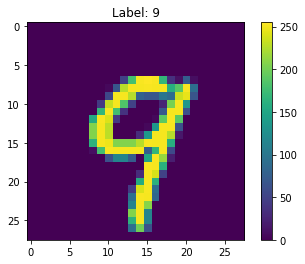

In [3]:
plt.figure()

#plotting the first image in the training set
plt.subplot()
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))


plt.colorbar()
plt.grid(False)
plt.show()

#plotting the 2500th image in the training set
plt.subplot()
plt.imshow(train_images[2500])
plt.title("Label: {}".format(train_labels[2500]))

plt.colorbar()
plt.grid(False)
plt.show()

#plotting the 12th image in the test set
plt.subplot()
plt.imshow(test_images[12])
plt.title("Label: {}".format(test_labels[12]))

plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. The pixel values range from 0 to 255. Dividing the data by 255 scales to the required range. It's important that the training set and the testing set be preprocessed in the same way.

In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0


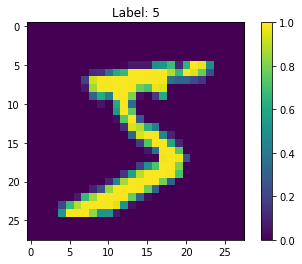

In [5]:
# recheck range of dataset after scaling

plt.figure()

#plotting the first image in the training set
plt.subplot()
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))


plt.colorbar()
plt.grid(False)
plt.show()


In [7]:
#Split training data to training and validation sets

x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]

print("x_train: {}".format(x_train.shape)) 
print("x_val: {}".format(x_val.shape)) 
print("y_train: {}".format(y_train.shape)) 
print("y_val: {}".format(y_val.shape)) 
 

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


Transform the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this as unstacking rows of pixels in the image and lining them up. 

In [8]:
#Reshaping the data
new_dimension = np.prod(train_images.shape[1:])

x_train = x_train.reshape(x_train.shape[0], new_dimension)

x_val = x_val.reshape(x_val.shape[0], new_dimension)

test_images = test_images.reshape(test_images.shape[0], new_dimension)

print("x_train: {}".format(x_train.shape)) 
print("x_val: {}".format(x_val.shape)) 
print("test_images: {}".format(test_images.shape)) 


x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


In [9]:
#Encode Labels to Categorical Variables

from tensorflow.keras.utils import to_categorical

num_labels = 10

y_train = to_categorical(y_train, num_labels)

y_val = to_categorical(y_val, num_labels)

y_test = to_categorical(test_labels, num_labels)

### Activation Functions and Neural Network Hyperparameters

We will now define an input placeholder X, which will have a dimension of None x 784 (new_dimension= 784) and the output placeholder with a dimension of None x 10.

A placeholder is simply a variable that we will assign data to at a later date. It allows us to create our operations and build our computation graph, without needing the data. In TensorFlow terminology, we then feed data into the graph through these placeholders. The first dimension of the placeholder is None, meaning we can have any number of rows.

In [13]:
# input layer
#placeholders are not enabled in tf 2

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


X = tf.placeholder(tf.float32, [None, new_dimension])
Y = tf.placeholder(tf.float32, [None, num_labels])


Instructions for updating:
non-resource variables are not supported in the long term


### Building the model Architecture

In [14]:
# create model architecture
def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
  # first layer
  first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
  first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
  first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))

  # second layer
  second_weight = tf.Variable(tf.random_uniform([first_layer_neurons,second_layer_neurons]))
  second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
  second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), 
                                          second_bias))

  # output layer
  final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
  final_bias = tf.Variable(tf.zeros([no_classes]))
  logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)

  return logits

In [15]:
logits = multilayer_perceptron(X, num_labels)

learning_rate = 0.01
#we define the loss and optimiser for the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### Running The Model

In [29]:
#initialise the variables
init = tf.global_variables_initializer()

epochs = 20
batch_size = 1000
iteration = len(x_train) // batch_size
#train model
with tf.Session() as session:
  session.run(init)
  for epoch in range(epochs):
    average_cost = 0
    start, end = 0, batch_size
    for i in range(iteration):
      batch_x, batch_y = x_train[start: end], y_train[start: end]
      _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
      start += batch_size
      end += batch_size 
      #average loss
      average_cost += loss/iteration
    print("Epoch========{}".format(epoch))
    #evaluate model
  prediction = tf.nn.softmax(logits)
  ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
  accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
  print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))

Epoch========0
Epoch========1
Epoch========2
Epoch========3
Epoch========4
Epoch========5
Epoch========6
Epoch========7
Epoch========8
Epoch========9
Epoch========10
Epoch========11
Epoch========12
Epoch========13
Epoch========14
Epoch========15
Epoch========16
Epoch========17
Epoch========18
Epoch========19
Accuracy: 0.920199990272522


### Optimization for Training Deep Neural Network

In [30]:
#Building a Sequential Feed Forward Network in Keras

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

#Build the model object
model = Sequential()

# Build the input and the hidden layers
model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
model.add(Dense(128, activation='relu'))

# Build the output layer
model.add(Dense(num_labels, activation='softmax'))




Now that the model is in place, we configure the learning process using .compile(). Here we specify our loss function (or objective function). For our setting categorical cross entropy fits the bill, but in general other loss functions are available.

As for the optimizer of choice we'll use Adam with default settings. We could also instantiate an optimizer and set parameters before passing it to model.compile() but for this example the defaults will do.

We also choose which metrics will be evaluated during training and testing. We can pass any list of metrics - even build metrics ourselves - and have them displayed during training/testing.

In [31]:
#compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

Having compiled our model we can now start the training process. We have to specify how many times we want to iterate on the whole training set (epochs) and how many samples we use for one update to the model's weights (batch size).

In [46]:
#fit the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000)

test_loss, test_accuracy = model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 23us/sample - loss: 1.2588e-04 - acc: 1.0000 - val_loss: 0.1035 - val_acc: 0.9800
Epoch 2/20
50000/50000 [==============================] - 1s 22us/sample - loss: 1.1991e-04 - acc: 1.0000 - val_loss: 0.1044 - val_acc: 0.9802
Epoch 3/20
50000/50000 [==============================] - 1s 23us/sample - loss: 1.1552e-04 - acc: 1.0000 - val_loss: 0.1044 - val_acc: 0.9802
Epoch 4/20
50000/50000 [==============================] - 1s 23us/sample - loss: 1.0958e-04 - acc: 1.0000 - val_loss: 0.1045 - val_acc: 0.9795
Epoch 5/20
50000/50000 [==============================] - 1s 23us/sample - loss: 1.0612e-04 - acc: 1.0000 - val_loss: 0.1056 - val_acc: 0.9796
Epoch 6/20
50000/50000 [==============================] - 1s 22us/sample - loss: 1.0301e-04 - acc: 1.0000 - val_loss: 0.1051 - val_acc: 0.9802
Epoch 7/20
50000/50000 [==============================] - 1s 22us/sample - loss: 9.9550e-05 

Text(0.5, 1.0, 'Loss Curves - before regularisation')

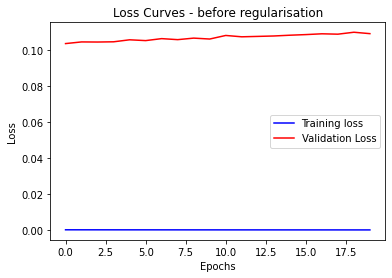

In [47]:
#Check for Overfitting
plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - before regularisation')

The validation and training loss don't look great, we can see that the validation loss decreases. This identifies overfitting in our network. How do we proceed? Introduce regularisation to the model.


In [44]:
from tensorflow.keras.layers import Dropout
reg_model = Sequential()
reg_model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation='relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(num_labels, activation='softmax'))

reg_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

reg_history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val), 
                            epochs=20, batch_size=1000)
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.9592 - acc: 0.6950 - val_loss: 0.2952 - val_acc: 0.9144
Epoch 2/20
50000/50000 [==============================] - 1s 28us/sample - loss: 0.3785 - acc: 0.8873 - val_loss: 0.2066 - val_acc: 0.9417
Epoch 3/20
50000/50000 [==============================] - 1s 28us/sample - loss: 0.2828 - acc: 0.9179 - val_loss: 0.1639 - val_acc: 0.9525
Epoch 4/20
50000/50000 [==============================] - 1s 28us/sample - loss: 0.2329 - acc: 0.9324 - val_loss: 0.1381 - val_acc: 0.9612
Epoch 5/20
50000/50000 [==============================] - 1s 28us/sample - loss: 0.2000 - acc: 0.9411 - val_loss: 0.1227 - val_acc: 0.9638
Epoch 6/20
50000/50000 [==============================] - 1s 28us/sample - loss: 0.1747 - acc: 0.9481 - val_loss: 0.1119 - val_acc: 0.9662
Epoch 7/20
50000/50000 [==============================] - 1s 28us/sample - loss: 0.1583 - acc: 0.9534 - val_loss: 0.

Text(0.5, 1.0, 'Loss Curves - after regularisation')

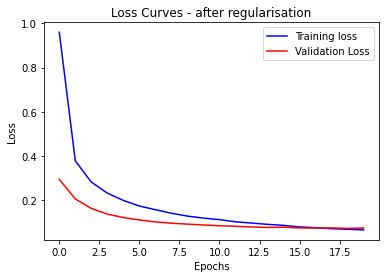

In [45]:
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - after regularisation')

###Making Predictions

In [48]:
predictions = model.predict([test_images]) # Make prediction
print(np.argmax(predictions[1000])) #print out the number in that index

9


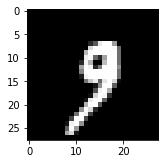

In [49]:
# Let's see whether the image would turn out to be 9
# Remember that the input data to the network were flattened for the purpose of learning to a vector with a length of 784. Before displaying it, we need to convert it back to the size of 28 x 28 pixels.
plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(test_images[1000].reshape(28,28), cmap="gray") # Import the image
plt.show() # Show the image

6


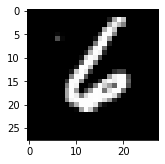

In [54]:
#Play around with other images and their prediction
print(np.argmax(predictions[7532]))

plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(test_images[7532].reshape(28,28), cmap="gray") # Import the image
plt.show() # Show the image

2


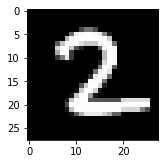

In [55]:
print(np.argmax(predictions[974]))

plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(test_images[974].reshape(28,28), cmap="gray") # Import the image
plt.show() # Show the image

7


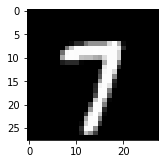

In [53]:
print(np.argmax(predictions[2567]))

plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(test_images[2567].reshape(28,28), cmap="gray") 
plt.show() 